In [1]:
import time

import numpy as np
np.set_printoptions()
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from context import src
from src.model.data_handler import save_datasets, load_datasets
from src.model.model import RubiksModel
from src.model.train import train

In [ ]:
# Creates a dataset with 2,000,000 random scrambled cubes between 5 and 21 solves
# First create a folder called "ignore". This will not be uploaded to github
datapath = save_datasets("ignore/", 2000000, 5000)

In [ ]:
datapath = "" # Use this if you are loading in an existing dataset

In [ ]:
internal_dimensions = ((2000, 1500, 500), (2500, 2500, 1000), (3000, 2500, 1500))
dropout_rates = [0, 0.1, 0.2]
learning_rates = [0.0008, 0.0005, 0.0002]
counter = 0 # set this to the next epoch after a crash and uncomment the next line
            # if it does crash, also edit the above lists to ensure you aren't retraining 
            # models you don't have to. 
last_saved = -1
results = {} if last_saved == -1 else torch.load("models/results_{}".format(last_saved))

for internal_dimension in internal_dimensions:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:
            if counter > last_saved:
                model = RubiksModel(internal_dimensions=internal_dimension, dropout_rate=dropout_rate, activation=nn.ReLU)
                train_acc, train_loss, valid_acc, valid_loss = train(model, learning_rate=learning_rate, num_epochs=10, data_path=datapath, savepath="models/")
                results[(internal_dimension, dropout_rate, learning_rate)] = (train_acc, train_loss, valid_acc, valid_loss)
                torch.save(results, "models/results_{}".format(counter))
            counter += 1

0 ((2000, 1500, 500), 0, 0.0008) 2.2336250048446655
1 ((2000, 1500, 500), 0, 0.0005) 12.5
2 ((2000, 1500, 500), 0, 0.0002) 2.249422434501648
3 ((2000, 1500, 500), 0.1, 0.0008) 2.2265918413162233
4 ((2000, 1500, 500), 0.1, 0.0005) 2.221484826660156
5 ((2000, 1500, 500), 0.1, 0.0002) 2.2339238243103026
6 ((2000, 1500, 500), 0.2, 0.0008) 2.2223282287597654
7 ((2000, 1500, 500), 0.2, 0.0005) 2.2208819826507566
8 ((2000, 1500, 500), 0.2, 0.0002) 2.222626860084534
9 ((2500, 2500, 1000), 0, 0.0008) 2.2346872343444826
10 ((2500, 2500, 1000), 0, 0.0005) 2.232029612464905
11 ((2500, 2500, 1000), 0, 0.0002) 2.242036467437744
12 ((2500, 2500, 1000), 0.1, 0.0008) 2.2217695268249513
13 ((2500, 2500, 1000), 0.1, 0.0005) 2.227293546104431
14 ((2500, 2500, 1000), 0.1, 0.0002) 2.2303983265304566
15 ((2500, 2500, 1000), 0.2, 0.0008) 2.2117432177352905
16 ((2500, 2500, 1000), 0.2, 0.0005) 2.2219774848937988
17 ((2500, 2500, 1000), 0.2, 0.0002) 2.2173705645370485
18 ((3000, 2500, 1500), 0, 0.0008) 2.242735

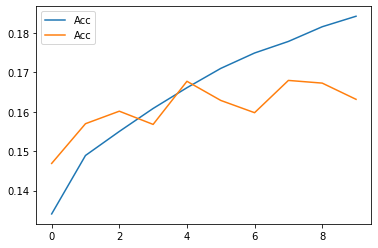

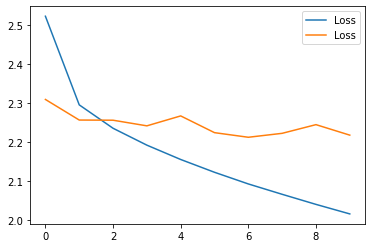

In [7]:
results = torch.load(r"D:\Unversity of Toronto\Courses\Year 3\APS360 (Applied Fundamentals of Machine Learning)\Project\results\modelsround2\results_26")
# results = torch.load(r"D:\Unversity of Toronto\Courses\Year 3\APS360 (Applied Fundamentals of Machine Learning)\Project\results\results_t1\results26")

for i, item in enumerate(results):
    train_acc, train_loss, valid_acc, valid_loss = results[item]
    print(i, item, np.min(valid_loss))

train_acc, train_loss, valid_acc, valid_loss = results[((2500, 2500, 1000), 0.2, 0.0008)]

plt.plot(np.arange(len(train_acc)), train_acc, np.arange(len(train_acc)), valid_acc, label="Acc")
plt.legend()
plt.show()
plt.plot(np.arange(len(train_loss)), train_loss, np.arange(len(train_loss)), valid_loss, label="Loss")
plt.legend()
plt.show()